## **Medical Data visualizer**

In [12]:
import pandas as pd

import seaborn as sns

#### 1) Import the data from medical_examination.csv and assign it to the df variable

In [6]:
df = pd.read_csv('other\medical_examination.csv', sep=',')

<>:1: SyntaxWarning: invalid escape sequence '\m'
<>:1: SyntaxWarning: invalid escape sequence '\m'
C:\Users\User\AppData\Local\Temp\ipykernel_11168\3850391279.py:1: SyntaxWarning: invalid escape sequence '\m'
  df = pd.read_csv('other\medical_examination.csv', sep=',')


#### 2) Create the overweight column in the df variable

In [8]:
over_weight = pd.Series((df['weight']/(df['height']/100)**2) > 25).astype(int)

In [9]:
over_weight

0        0
1        1
2        0
3        1
4        0
        ..
69995    1
69996    1
69997    1
69998    1
69999    0
Length: 70000, dtype: int32

In [11]:
df['overweight'] = over_weight

#### 3) Normalize data by making 0 always good and 1 always bad. If the value of cholesterol or gluc is 1, set the value to 0. If the value is more than 1, set the value to 1.

In [13]:
df.head()

,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,overweight
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1,0
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0,0


In [14]:
df['cholesterol'] = (df['cholesterol'] > 1).astype(int)

In [15]:
df['gluc'] = (df['gluc'] > 1).astype(int)

In [16]:
df.head()

,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,overweight
0,0,18393,2,168,62.0,110,80,0,0,0,0,1,0,0
1,1,20228,1,156,85.0,140,90,1,0,0,0,1,1,1
2,2,18857,1,165,64.0,130,70,1,0,0,0,0,1,0
3,3,17623,2,169,82.0,150,100,0,0,0,0,1,1,1
4,4,17474,1,156,56.0,100,60,0,0,0,0,0,0,0


#### 4) Draw the Categorical Plot in the draw_cat_plot function

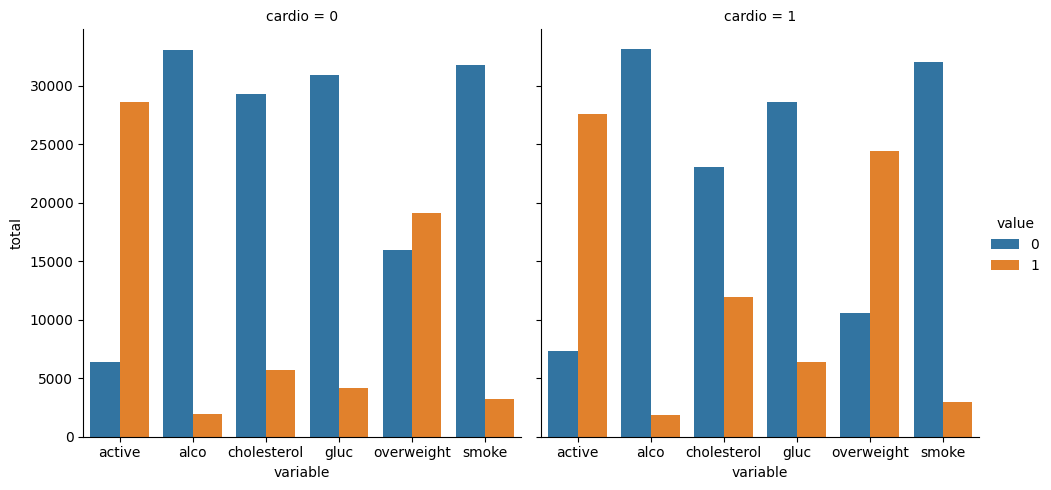

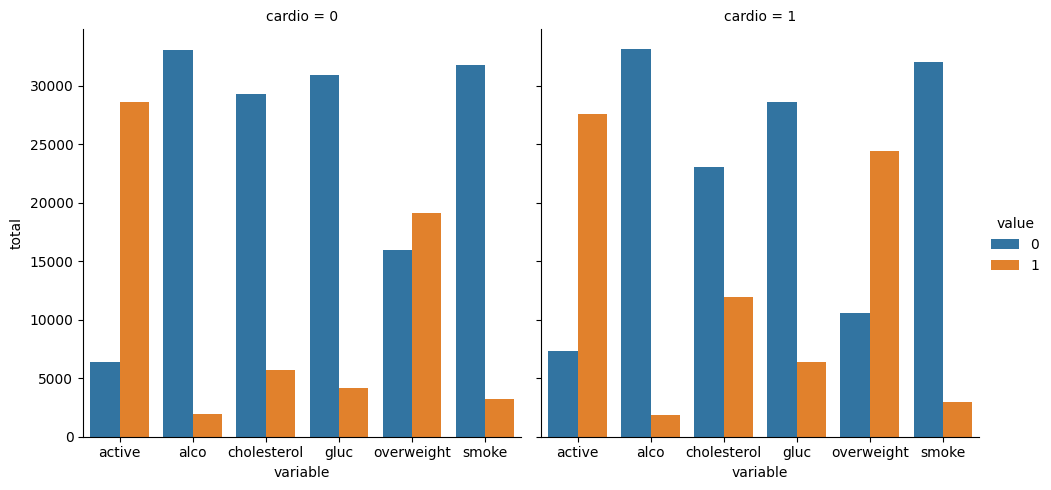

In [17]:
def draw_cat_plot():
    df_cat = pd.melt(df,id_vars=['cardio'],value_vars=['cholesterol', 'gluc', 'smoke', 'alco', 'active','overweight'])
    df_cat= df_cat.groupby(['cardio','variable','value']).size().reset_index(name='total')
    fig = sns.catplot(x="variable", y="total", hue="value", col="cardio", kind="bar", data=df_cat)
    fig = fig.fig
    fig.savefig('catplot.png')
    return fig
    
draw_cat_plot()
    

In [19]:
def draw_heat_map():
    heat_map = df[
        (df['ap_lo'] <= df['ap_hi']) &
        (df['height'] >= df['height'].quantile(0.025)) &
        (df['height'] <= df['height'].quantile(0.975)) &
        (df['weight'] >= df['weight'].quantile(0.025)) &
        (df['weight'] <= df['weight'].quantile(0.975)) 
    
    ]
    
    corr = heat_map.corr()
    mask = np.triu(np.ones_like(corr, dtype=bool))
    fig, ax = plt.subplots(figsize=(11, 9))
    fig = sns.heatmap(corr, mask=mask, annot=True, fmt=".1f", linewidths=.5, ax=ax)
    # fig.savefig('heatmap.png')
    return fig

draw_heat_map()

NameError: name 'np' is not defined